In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Type of loaded data X:{0} Y:{1}".format(type(x_train),type(y_train)))

Type of loaded data X:<class 'numpy.ndarray'> Y:<class 'numpy.ndarray'>


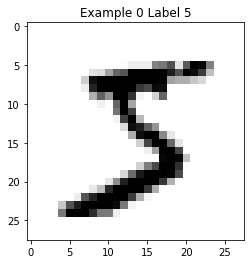

In [10]:
def display(i):
    img = x_train[0]
    plt.title("Example {} Label {}".format(i,y_train[i]))
    plt.imshow(img, cmap=plt.cm.gray_r)
display(0)

In [6]:
# Normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0
# Creating model with their hidden layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Compiling model and defining optimizer and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
#Training and evaluation
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4888 - accuracy: 0.8576
Epoch 2/5
1875/1875 [==============================] - 2s 946us/step - loss: 0.1558 - accuracy: 0.9529
Epoch 3/5
1875/1875 [==============================] - 2s 962us/step - loss: 0.1145 - accuracy: 0.9646
Epoch 4/5
1875/1875 [==============================] - 2s 975us/step - loss: 0.0925 - accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 2s 962us/step - loss: 0.0726 - accuracy: 0.9774
313/313 - 0s - loss: 0.0760 - accuracy: 0.9768


[0.0759880319237709, 0.9768000245094299]

In [37]:
#Visualize weights
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
